# Data Analysis on Ride share with uber

In order to perform data analysis, my approach follows below steps:

1. Data Collection

2. Exploratory Data Analysis

3. Feature Developement

4. Modelling

5. Testing

# Data Collection

In [1]:
import pandas as pd

uber_rides = pd.read_csv("/Users/sravanisaadhu/Downloads/Uber_filtered.csv")

# Exploratory Data Analysis

In [2]:
uber_rides.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
3,10,9043bf77-1d45-4a93-9520-a083e0277f16,1.543594e+09,16,30,11,2018-11-30 16:13:03,America/New_York,Back Bay,Northeastern University,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
4,14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [3]:
uber_rides.shape

(322844, 58)

In [4]:
uber_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322844 entries, 0 to 322843
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   322844 non-null  int64  
 1   id                           322844 non-null  object 
 2   timestamp                    322844 non-null  float64
 3   hour                         322844 non-null  int64  
 4   day                          322844 non-null  int64  
 5   month                        322844 non-null  int64  
 6   datetime                     322844 non-null  object 
 7   timezone                     322844 non-null  object 
 8   source                       322844 non-null  object 
 9   destination                  322844 non-null  object 
 10  cab_type                     322844 non-null  object 
 11  product_id                   322844 non-null  object 
 12  name                         322844 non-null  object 
 13 

In [5]:
uber_rides.describe()

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,322844.000000,3.228440e+05,322844.000000,322844.000000,322844.000000,267749.000000,322844.000000,322844.000000,322844.000000,322844.000000,...,322844.000000,3.228440e+05,322844.000000,3.228440e+05,322844.000000,3.228440e+05,322844.000000,3.228440e+05,322844.000000,3.228440e+05
mean,346778.946299,1.544047e+09,11.611986,17.793380,11.587045,14.596878,2.189991,1.005900,42.338073,-71.066162,...,0.037368,1.544045e+09,33.458969,1.544042e+09,45.263932,1.544048e+09,29.730870,1.544049e+09,41.997339,1.544049e+09
std,200151.866895,6.893543e+05,6.945794,9.977869,0.492366,9.573120,1.150471,0.059262,0.047918,0.020321,...,0.055194,6.913761e+05,6.468837,6.903767e+05,5.647543,6.903028e+05,7.113967,6.873598e+05,6.941223,6.912309e+05
min,0.000000,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,173489.750000,1.543444e+09,6.000000,13.000000,11.000000,7.500000,1.280000,1.000000,42.350300,-71.081000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,346785.000000,1.543738e+09,12.000000,17.000000,12.000000,10.500000,2.170000,1.000000,42.351900,-71.063100,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,520066.250000,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.880000,1.000000,42.364700,-71.054200,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,693070.000000,1.545161e+09,23.000000,30.000000,12.000000,89.500000,7.860000,2.000000,42.366100,-71.033000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [6]:
uber_rides.isnull().sum()

Unnamed: 0                         0
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
w

# Feature Development

Importing Required plot libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd

Strip Plots

<AxesSubplot:xlabel='price', ylabel='name'>

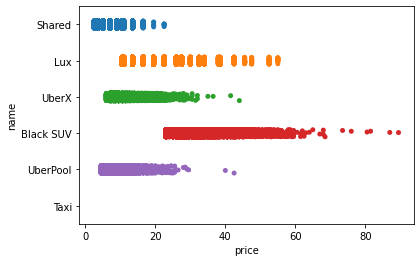

In [8]:
sns.stripplot(data=uber_rides, x='price', y='name')

<AxesSubplot:xlabel='price', ylabel='icon'>

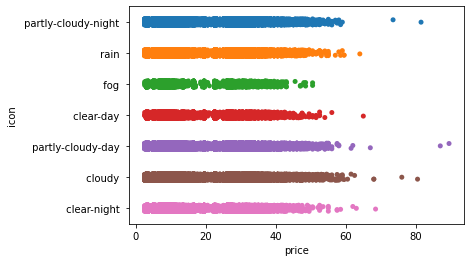

In [9]:
sns.stripplot(data=uber_rides, x='price', y='icon')

Time stamp Convertion to Date and time

In [10]:
uber_rides['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543818e+09
3    1.543594e+09
4    1.544729e+09
Name: timestamp, dtype: float64

In [11]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 04:30:08
dt_object = 2018-11-26 21:00:24
dt_object = 2018-12-03 01:28:03
dt_object = 2018-11-30 11:13:04
dt_object = 2018-12-13 14:15:04


# Bar Plots

<AxesSubplot:>

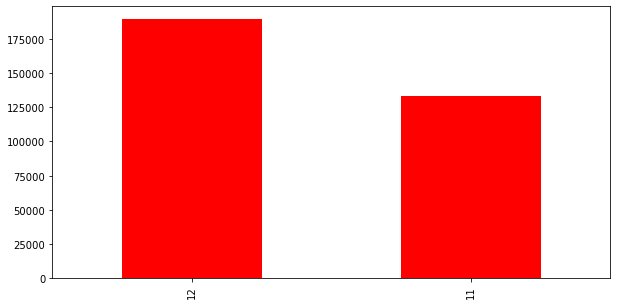

In [12]:
uber_rides['month'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

<AxesSubplot:>

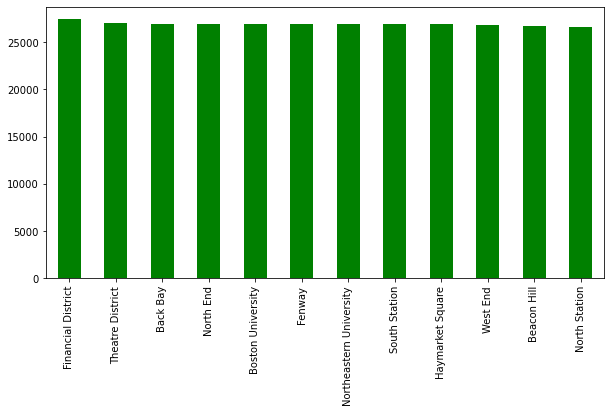

In [18]:
uber_rides['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

<AxesSubplot:>

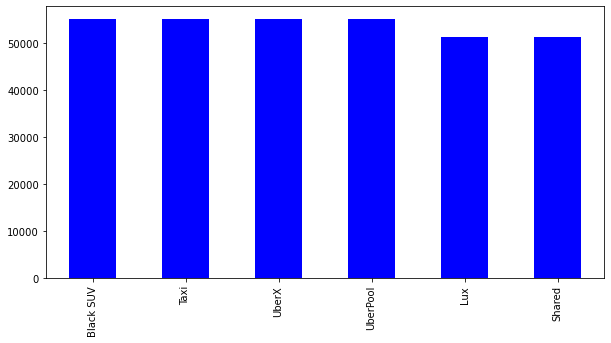

In [19]:
uber_rides['name'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

<AxesSubplot:>

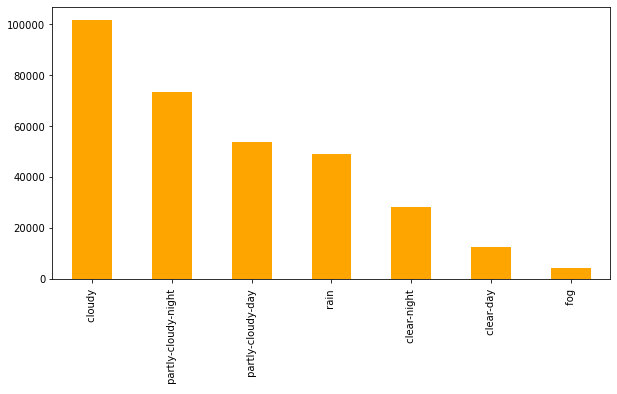

In [20]:
uber_rides['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

# Feature Modelling

Label Encoding

In [21]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [22]:
uber_rides.dtypes

Unnamed: 0                       int64
id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                

In [23]:
uber_rides['id']= label_encoder.fit_transform(uber_rides['id']) 
uber_rides['datetime']= label_encoder.fit_transform(uber_rides['datetime']) 
uber_rides['timezone']= label_encoder.fit_transform(uber_rides['timezone'])
uber_rides['destination']= label_encoder.fit_transform(uber_rides['destination']) 
uber_rides['product_id']= label_encoder.fit_transform(uber_rides['product_id'])
uber_rides['short_summary']= label_encoder.fit_transform(uber_rides['short_summary'])
uber_rides['long_summary']= label_encoder.fit_transform(uber_rides['long_summary'])

In [24]:
uber_rides['name']= label_encoder.fit_transform(uber_rides['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black SUV --> 0
Lux --> 1
Shared --> 2
Taxi --> 3
UberPool --> 4
UberX --> 5


In [25]:
uber_rides['source']= label_encoder.fit_transform(uber_rides['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [26]:
uber_rides['icon']= label_encoder.fit_transform(uber_rides['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [27]:
uber_rides.dtypes

Unnamed: 0                       int64
id                               int64
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int64
timezone                         int64
source                           int64
destination                      int64
cab_type                        object
product_id                       int64
name                             int64
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int64
long_summary                     int64
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                

In [28]:
uber_rides.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0,83667,1.544953e+09,9,16,12,25323,0,5,7,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1,95698,1.543284e+09,2,27,11,960,0,5,7,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,8,100484,1.543818e+09,6,3,12,14499,0,0,8,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
3,10,181550,1.543594e+09,16,30,11,8152,0,0,8,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
4,14,67474,1.544729e+09,19,13,12,18731,0,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


# Null Value Filling

In [29]:
uber_rides.isnull().sum()

Unnamed: 0                         0
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
w

In [30]:
uber_rides['price'].median()

10.5

In [31]:
uber_rides["price"].fillna(10.5, inplace = True) 

In [32]:
uber_rides.isnull().sum()

Unnamed: 0                     0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

In [33]:
uber_rides['price'].dtype

dtype('float64')

In [34]:
uber_rides['price'] = uber_rides['price'].astype(int)

In [35]:
uber_rides['price'].head()

0     5
1    11
2     3
3    13
4     7
Name: price, dtype: int64

In [54]:
del uber_rides['cab_type']

# RFE (Recursive Feature Elimination)

In [55]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
from sklearn.feature_selection import RFE

In [59]:
X = uber_rides.drop('price', axis = 1)
y = uber_rides['price']

In [60]:
X.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0,83667,1.544953e+09,9,16,12,25323,0,5,7,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1,95698,1.543284e+09,2,27,11,960,0,5,7,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,8,100484,1.543818e+09,6,3,12,14499,0,0,8,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
3,10,181550,1.543594e+09,16,30,11,8152,0,0,8,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
4,14,67474,1.544729e+09,19,13,12,18731,0,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [61]:
y.head()

0     5
1    11
2     3
3    13
4     7
Name: price, dtype: int64

In [62]:
X.shape

(322844, 56)

In [63]:
y.shape

(322844,)

<AxesSubplot:>

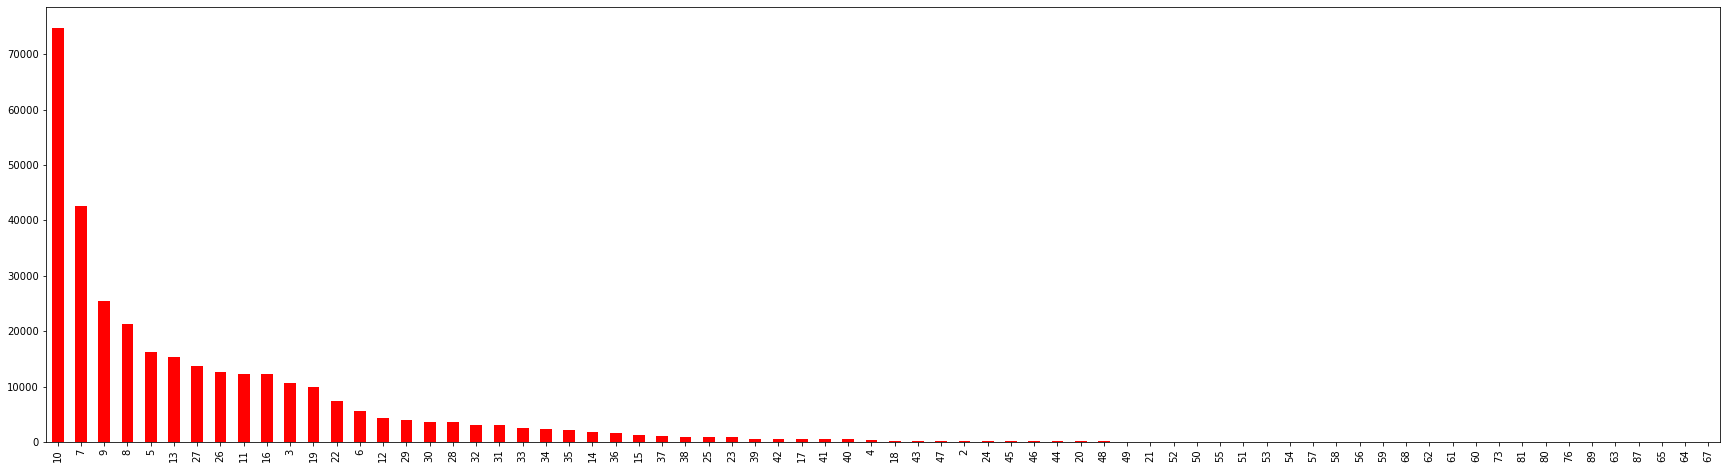

In [64]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')

# Splitting the data set into training set and test set for training and validation of the ML Models

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
X_train.shape

(258275, 56)

In [67]:
X_test.shape

(64569, 56)

In [68]:
y_train.shape

(258275,)

In [69]:
y_test.shape

(64569,)

In [70]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

In [71]:
reg.score(X_train, y_train)

0.8054845264899508

# Testing and training All the accuracies with 56 features

In [110]:
rfe = RFE(reg,n_features_to_select=56, verbose=1)
rfe = rfe.fit(X, y)

In [111]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [112]:
XX = X[X.columns[rfe.support_]]

In [113]:
XX.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0,83667,1.544953e+09,9,16,12,25323,0,5,7,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1,95698,1.543284e+09,2,27,11,960,0,5,7,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,8,100484,1.543818e+09,6,3,12,14499,0,0,8,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
3,10,181550,1.543594e+09,16,30,11,8152,0,0,8,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
4,14,67474,1.544729e+09,19,13,12,18731,0,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [114]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [115]:
X_train.shape

(225990, 56)

In [116]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [117]:
reg1.score(X_train, y_train)

0.8050848133093852

# Testing and training accuracy with 40 features

In [118]:
rfe = RFE(reg,n_features_to_select= 40,step=1)
rfe = rfe.fit(X, y)

In [119]:
rfe.support_

array([False, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [120]:
XX = X[X.columns[rfe.support_]]

In [121]:
#Final Dateset after preprocessing 
XX.head()

,hour,day,month,source,destination,product_id,name,distance,surge_multiplier,latitude,...,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,4,2,0.44,1.0,42.2148,...,10.000,303.8,1544962084,1544994864,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,5,1,0.44,1.0,42.2148,...,4.786,291.1,1543232969,1543266992,0.64,0.1300,40.49,47.30,36.20,43.92
2,6,3,12,0,8,4,2,1.08,1.0,42.3503,...,1.413,290.9,1543838259,1543871628,0.89,0.0004,43.09,57.02,39.90,56.35
3,16,30,11,0,8,5,1,1.08,1.0,42.3503,...,9.920,269.9,1543578871,1543612479,0.79,0.0004,28.64,42.32,29.29,40.48
4,19,13,12,6,11,0,5,1.11,1.0,42.3647,...,9.959,330.8,1544702792,1544735599,0.21,0.0001,18.29,33.83,13.79,32.85


In [122]:
#Splitting the final data set into test and train
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [123]:
X_train.shape

(225990, 40)

In [124]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [125]:
reg1.score(X_train, y_train)

0.8050662132748485

Testing and training accuracy with 15 features

In [127]:
rfe = RFE(reg,n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [128]:
XX = X[X.columns[rfe.support_]]

In [129]:
XX.head()

,source,product_id,name,distance,surge_multiplier,latitude,longitude,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,cloudCover,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,5,4,2,0.44,1.0,42.2148,-71.0330,0.0000,0.68,43.68,37.95,0.72,0.1276,43.68,38.07
1,5,5,1,0.44,1.0,42.2148,-71.0330,0.1299,0.94,47.30,43.92,1.00,0.1300,47.30,43.92
2,0,4,2,1.08,1.0,42.3503,-71.0810,0.0000,0.96,57.02,56.35,1.00,0.0004,57.02,56.35
3,0,5,1,1.08,1.0,42.3503,-71.0810,0.0000,0.62,42.32,40.48,0.12,0.0004,42.32,40.48
4,6,0,5,1.11,1.0,42.3647,-71.0542,0.0000,0.56,33.83,32.85,0.64,0.0001,33.83,32.85


In [130]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [131]:
X_train.shape

(225990, 15)

In [132]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [133]:
reg1.score(X_train, y_train)

0.8050457819854595

Testing the training accuracy with 25 features

In [134]:
rfe = RFE(reg, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [135]:
XX = X[X.columns[rfe.support_]]

In [136]:
XX.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,apparentTemperature,...,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12,5,7,4,2,0.44,1.0,42.2148,-71.0330,37.12,...,43.68,37.95,5,32.70,0.72,0,0.30,0.1276,43.68,38.07
1,11,5,7,5,1,0.44,1.0,42.2148,-71.0330,37.35,...,47.30,43.92,6,41.83,1.00,0,0.64,0.1300,47.30,43.92
2,12,0,8,4,2,1.08,1.0,42.3503,-71.0810,45.58,...,57.02,56.35,3,44.50,1.00,0,0.89,0.0004,57.02,56.35
3,11,0,8,5,1,1.08,1.0,42.3503,-71.0810,38.00,...,42.32,40.48,0,27.99,0.12,2,0.79,0.0004,42.32,40.48
4,12,6,11,0,5,1.11,1.0,42.3647,-71.0542,32.85,...,33.83,32.85,4,18.66,0.64,0,0.21,0.0001,33.83,32.85


In [137]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [138]:
X_train.shape

(225990, 25)

In [139]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [140]:
reg1.score(X_train, y_train)

0.8055355151598159

Since we find the accuracy for k = 56 , 40 , 25 and 15.

Hence we noticed that the when k = 25 we get the maximum training accuracy in Linear Regression Model

25 Columns after RFE

In [141]:
XX.columns

Index(['month', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature',
       'long_summary', 'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh', 'icon', 'dewPoint',
       'cloudCover', 'uvIndex', 'moonPhase', 'precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [142]:
XX.shape

(322844, 25)

In [143]:
XX.head()

,month,source,destination,product_id,name,distance,surge_multiplier,latitude,longitude,apparentTemperature,...,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12,5,7,4,2,0.44,1.0,42.2148,-71.0330,37.12,...,43.68,37.95,5,32.70,0.72,0,0.30,0.1276,43.68,38.07
1,11,5,7,5,1,0.44,1.0,42.2148,-71.0330,37.35,...,47.30,43.92,6,41.83,1.00,0,0.64,0.1300,47.30,43.92
2,12,0,8,4,2,1.08,1.0,42.3503,-71.0810,45.58,...,57.02,56.35,3,44.50,1.00,0,0.89,0.0004,57.02,56.35
3,11,0,8,5,1,1.08,1.0,42.3503,-71.0810,38.00,...,42.32,40.48,0,27.99,0.12,2,0.79,0.0004,42.32,40.48
4,12,6,11,0,5,1.11,1.0,42.3647,-71.0542,32.85,...,33.83,32.85,4,18.66,0.64,0,0.21,0.0001,33.83,32.85


# Drop Useless Features

In [144]:
features_drop = ['latitude', 'longitude', 'apparentTemperature',
       'long_summary', 'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint','precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax', 'distance', 'cloudCover', 'moonPhase']
new_uber = XX.drop(features_drop, axis=1)

In [145]:
new_uber.head()

,month,source,destination,product_id,name,surge_multiplier,icon,uvIndex
0,12,5,7,4,2,1.0,5,0
1,11,5,7,5,1,1.0,6,0
2,12,0,8,4,2,1.0,3,0
3,11,0,8,5,1,1.0,0,2
4,12,6,11,0,5,1.0,4,0


# Binning

In [148]:
month_mapping = {11: 0, 12: 1}
new_uber['month'] = new_uber['month'].map(month_mapping)

In [149]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4}
new_uber['surge_multiplier'] = new_uber['surge_multiplier'].map(surge_multiplier_mapping)

# Final Dataset

In [150]:
new_uber.head()

,month,source,destination,product_id,name,surge_multiplier,icon,uvIndex
0,1,5,7,4,2,0,5,0
1,0,5,7,5,1,0,6,0
2,1,0,8,4,2,0,3,0
3,0,0,8,5,1,0,0,2
4,1,6,11,0,5,0,4,0


In [151]:
y.head()

0     5
1    11
2     3
3    13
4     7
Name: price, dtype: int64

# Modelling

In [152]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(new_uber, y, test_size = 0.2, random_state = 42)

In [153]:
xx_train.shape

(258275, 8)

In [154]:
xx_test.shape

(64569, 8)

In [155]:
yy_train.shape

(258275,)

In [156]:
yy_test.shape

(64569,)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

# Linear Regression

In [158]:
linear = LinearRegression()
linear.fit(xx_train, yy_train)
linear.score(xx_test, yy_test)

0.7475450731641593

# Decision Tree

In [159]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(xx_train , yy_train) 
decision.score(xx_test, yy_test)

0.9617917299993272

# Random Forest Classifier

In [160]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
random.fit(xx_train , yy_train)  
random.score(xx_test, yy_test)

0.9622694743419838

# Gradient Boost regressor

In [161]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [162]:
clf.score(xx_test, yy_test)

0.9631872029033662

# K fold cross validation

In [163]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.75028011, 0.75047377, 0.74819024, 0.75061918, 0.74745602])

# Testing

Linear regression

In [164]:
linear.coef_

array([ 1.31668826e-02, -3.88218032e-02, -8.15543686e-02, -2.78093598e+00,
       -4.52948453e+00,  5.84661636e+00,  5.63253668e-03,  1.57160771e-02])

In [165]:
prediction = linear.predict(xx_test)
prediction

array([ 8.65732287, 12.90624268, 11.44487949, ..., 28.68756688,
       29.18862538, 12.89669938])

In [166]:
prediction=  prediction.astype(int)

Text(0, 0.5, 'Predicted Y')

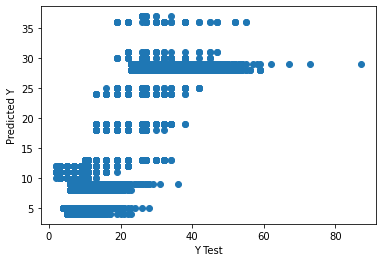

In [167]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [168]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   3.4060772197184406
MSE :   20.033437098297945
RMAE :   4.475872775034825


/Users/sravanisaadhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

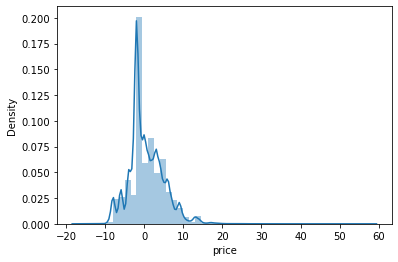

In [169]:
sns.distplot(yy_test - prediction,bins=50)

Random Forest

In [170]:
predictions = random.predict(xx_test)

/Users/sravanisaadhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Y')

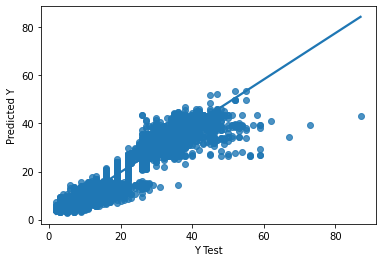

In [171]:
sns.regplot(yy_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [172]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(yy_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,predictions)))

MAE :   0.9981370098530818
MSE :   2.944653619230457
RMAE :   1.7159993063024404


/Users/sravanisaadhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

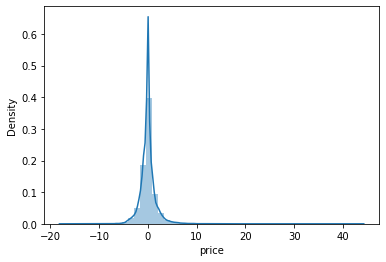

In [173]:
sns.distplot(yy_test - predictions,bins=50)

# Price prediction function

In [174]:
new_uber.head()

,month,source,destination,product_id,name,surge_multiplier,icon,uvIndex
0,1,5,7,4,2,0,5,0
1,0,5,7,5,1,0,6,0
2,1,0,8,4,2,0,3,0
3,0,0,8,5,1,0,0,2
4,1,6,11,0,5,0,4,0


In [176]:
def predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]

    x = np.zeros(len(new_uber.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0]

In [177]:
pre= random.predict(xx_test)

## Follow these instructions before predicting the price:
For cab_name: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5

For Source: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11

For Surge_multiplier : Enter Surge Multiplier value from 0 to 4

for Icon: clear-day --> 0 , clear-night --> 1 , cloudy --> 2 , fog --> 3 , partly-cloudy-day --> 4 , partly-cloudy-night --> 5 , rain --> 6

predict_price(cab_name , source , surge_multiplier , icon)

In [181]:
predict_price(1 , 3, 2, 0)

/var/folders/qp/z26w0hw109s4hfw__r7k7spm0000gn/T/ipykernel_25703/3659057063.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/Users/sravanisaadhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


26.440184991891492